# Capstone Sprint 1:
# <b> Colon Tissue Image Classification 

## Overview 

Utilizing the MHIST dataset, as referenced in a recent publication and another available on GitHub taken from the hospital in Chaoyang, Beijing, this project's primary objective is to develop a machine learning model that can accurately identify malignancies in various colon tissue biopsies. This effort is particularly significant for researchers specializing in gastrointestinal anatomy, as it provides valuable insights with the potential to drive further research and contribute to the development of new treatments for colon-related diseases.

The initial phase of this project involves conducting basic exploratory analysis and visualization of the two datasets. Our approach, centered around the use of advanced methodologies like convolutional neural networks, aims to achieve two key goals: firstly, to significantly improve the accuracy of classifying diseased colon tissue, and secondly, to enhance our comprehension of the unique challenges and possibilities inherent in applying AI to medical image analysis. This dual focus aligns with the broader goal of harnessing AI's power to revolutionize diagnostic processes in the field of pathology. 

## Table of Contents
- [Dataset](#dataset)<br>
- [Setup Enviornment](#setup-enviornment)<br>
- [EDA](#exploratory-data-analysis)

## Dataset

<br>The datasets comes with labeled .csv files that lables the images.

<br>[MHIST](https://bmirds.github.io/MHIST/)
<br>_Contains:_
- Test 977 images
- Train 2,175 
<br>* dataset is not split 

<br>[Chaoyang](https://github.com/bupt-ai-cz/HSA-NRL/?tab=readme-ov-file)
<br>_Contains:_
- Test 2,139 images 
- Train 4,021 images
<br>* were already pre-split into seperate folders upon download

## Setup Enviornment


In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import tifffile
import tensorflow as tf
import os
from PIL import Image
import cv2
import json


# Exploratory Data Analysis

First we will extract some information from the csv files in the Chaoyang and MHIST dataset.

In [38]:
mhist_csv = pd.read_csv('/Users/yukiekuang/Downloads/annotations.csv')


In [48]:
try:
    with open('/Users/yukiekuang/Downloads/train.json', 'r') as file:
        data = json.load(file)

    for item in data:
        print(item)  # This prints each dictionary in the list

except FileNotFoundError:
    print("The file was not found.")
except json.JSONDecodeError:
    print("Error decoding JSON.")

{'label': 1, 'name': 'train/353042_4-IMG005x014-1.JPG'}
{'label': 1, 'name': 'train/353042_4-IMG005x015-1.JPG'}
{'label': 1, 'name': 'train/353042_4-IMG006x010-1.JPG'}
{'label': 1, 'name': 'train/353042_4-IMG007x011-1.JPG'}
{'label': 1, 'name': 'train/353042_4-IMG007x015-1.JPG'}
{'label': 0, 'name': 'train/353042_4-IMG008x014-0.JPG'}
{'label': 1, 'name': 'train/353042_4-IMG009x015-1.JPG'}
{'label': 1, 'name': 'train/353042_4-IMG009x016-1.JPG'}
{'label': 1, 'name': 'train/353042_4-IMG010x014-1.JPG'}
{'label': 0, 'name': 'train/353042_4-IMG012x024-0.JPG'}
{'label': 0, 'name': 'train/353042_4-IMG013x024-0.JPG'}
{'label': 0, 'name': 'train/353042_4-IMG013x025-0.JPG'}
{'label': 0, 'name': 'train/353042_4-IMG014x024-0.JPG'}
{'label': 0, 'name': 'train/353042_4-IMG014x025-0.JPG'}
{'label': 2, 'name': 'train/535940-IMG009x024-2.JPG'}
{'label': 2, 'name': 'train/535940-IMG010x008-2.JPG'}
{'label': 2, 'name': 'train/535940-IMG010x013-2.JPG'}
{'label': 2, 'name': 'train/535940-IMG010x021-2.JPG'}


In [49]:
try:
    with open('/Users/yukiekuang/Downloads/test.json', 'r') as file:
        data = json.load(file)

    for item in data:
        print(item)  # This prints each dictionary in the list

except FileNotFoundError:
    print("The file was not found.")
except json.JSONDecodeError:
    print("Error decoding JSON.")

{'label': 2, 'name': 'test/535940-IMG009x022-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG009x023-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG009x026-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG010x011-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG010x012-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG010x024-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG010x026-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG011x008-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG011x010-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG011x012-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG011x013-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG011x014-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG011x021-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG011x025-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG011x026-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG011x029-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG012x010-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG012x011-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG012x012-2

Write loop that loops through image files in folders utilizing the OS module

In [29]:
directory1 = '/Users/yukiekuang/Downloads/train'
# directory1 contains the train Chaoyang dataset
# Prepare an empty list to store the image data
image_data1 = []

for filename in os.listdir(directory1):
    if filename.endswith(".JPG") or filename.endswith(".png"):
        file_path = os.path.join(directory1, filename)
        
        with Image.open(file_path) as img:
            #Append a tuple of file properties to the list
            image_data1.append((filename, img.size, img.mode, img.format))

# Create a DataFrame from the list
df1 = pd.DataFrame(image_data1, columns=['Filename', 'Size', 'Mode', 'Format'])

# Print the DataFrame
print(df1)

                       Filename        Size Mode Format
0       537699-IMG010x009-0.JPG  (512, 512)  RGB   JPEG
1     540293_1-IMG016x031-2.JPG  (512, 512)  RGB   JPEG
2       535953-IMG013x006-0.JPG  (512, 512)  RGB   JPEG
3       542441-IMG024x009-2.JPG  (512, 512)  RGB   JPEG
4     543358_2-IMG012x007-1.JPG  (512, 512)  RGB   JPEG
...                         ...         ...  ...    ...
4016    538850-IMG006x037-0.JPG  (512, 512)  RGB   JPEG
4017    538377-IMG025x012-0.JPG  (512, 512)  RGB   JPEG
4018  543645_1-IMG013x019-2.JPG  (512, 512)  RGB   JPEG
4019  535997_1-IMG013x011-0.JPG  (512, 512)  RGB   JPEG
4020  539085_2-IMG017x013-2.JPG  (512, 512)  RGB   JPEG

[4021 rows x 4 columns]


In [30]:
directory2 = '/Users/yukiekuang/Downloads/test'
# directory2 contains the test Chaoyang dataset
# Prepare an empty list to store the image data
image_data2 = []

for filename in os.listdir(directory2):
    if filename.endswith(".JPG") or filename.endswith(".png"):
        file_path = os.path.join(directory2, filename)
        
        with Image.open(file_path) as img:
            # Append a tuple of file properties to the list
            image_data2.append((filename, img.size, img.mode, img.format))

# Create a DataFrame from the list
df2 = pd.DataFrame(image_data2, columns=['Filename', 'Size', 'Mode', 'Format'])

# Print the DataFrame
print(df2)

                       Filename        Size Mode Format
0     538880-3-IMG011x046-1.JPG  (512, 512)  RGB   JPEG
1     537690_1-IMG013x010-0.JPG  (512, 512)  RGB   JPEG
2     537688_2-IMG008x009-0.JPG  (512, 512)  RGB   JPEG
3     543086_1-IMG010x012-2.JPG  (512, 512)  RGB   JPEG
4       538898-IMG011x008-1.JPG  (512, 512)  RGB   JPEG
...                         ...         ...  ...    ...
2134    541831-IMG035x022-2.JPG  (512, 512)  RGB   JPEG
2135  543086_1-IMG008x022-2.JPG  (512, 512)  RGB   JPEG
2136  538842_1-IMG006x004-0.JPG  (512, 512)  RGB   JPEG
2137  543086_1-IMG024x020-2.JPG  (512, 512)  RGB   JPEG
2138  538880-3-IMG024x051-3.JPG  (512, 512)  RGB   JPEG

[2139 rows x 4 columns]


In [31]:
directory3 = '/Users/yukiekuang/Downloads/images'
# directory3 contains the MHIST dataset
# Prepare an empty list to store the image data
image_data3 = []

for filename in os.listdir(directory3):
    if filename.endswith(".JPG") or filename.endswith(".png"):
        file_path = os.path.join(directory3, filename)
        
        with Image.open(file_path) as img:
            # Append a tuple of file properties to the list
            image_data3.append((filename, img.size, img.mode, img.format))

# Create a DataFrame from the list
df3 = pd.DataFrame(image_data3, columns=['Filename', 'Size', 'Mode', 'Format'])

# Print the DataFrame
print(df3)

           Filename        Size Mode Format
0     MHIST_djh.png  (224, 224)  RGB    PNG
1     MHIST_dis.png  (224, 224)  RGB    PNG
2     MHIST_atj.png  (224, 224)  RGB    PNG
3     MHIST_cou.png  (224, 224)  RGB    PNG
4     MHIST_awq.png  (224, 224)  RGB    PNG
...             ...         ...  ...    ...
3147  MHIST_avx.png  (224, 224)  RGB    PNG
3148  MHIST_cmg.png  (224, 224)  RGB    PNG
3149  MHIST_auc.png  (224, 224)  RGB    PNG
3150  MHIST_dhz.png  (224, 224)  RGB    PNG
3151  MHIST_dka.png  (224, 224)  RGB    PNG

[3152 rows x 4 columns]


Show a small sample of images from each dataset.

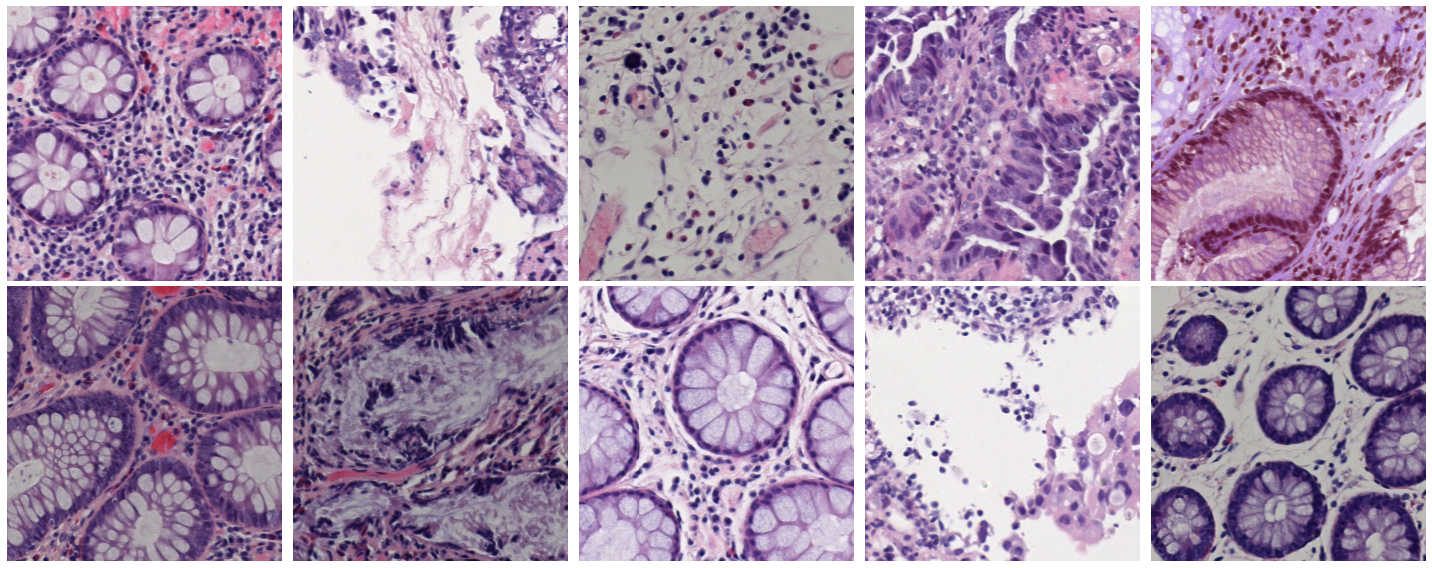

In [34]:
'''
create a function that passes in 3 parameters: image_path, position, and grid_size
when called, the function will create a subplot and place each positions 
'''

def display_image_in_grid(image_path, position, grid_size):
    plt.subplot(*grid_size, position)  # defines each individual subplot within grid. 
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide the axis

# Set the number of images to display
num_images_to_show = 10

# Set Grid size (rows, columns)
grid_size = (2, 5)

plt.figure(figsize=(20, 8))  # Set the figure size (width, height)

# Loop through the first few images and display them in the grid
for i in range(min(num_images_to_show, len(df1))):
    file_path = os.path.join(directory1, df1.iloc[i]['Filename'])
    display_image_in_grid(file_path, i+1, grid_size)

plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()

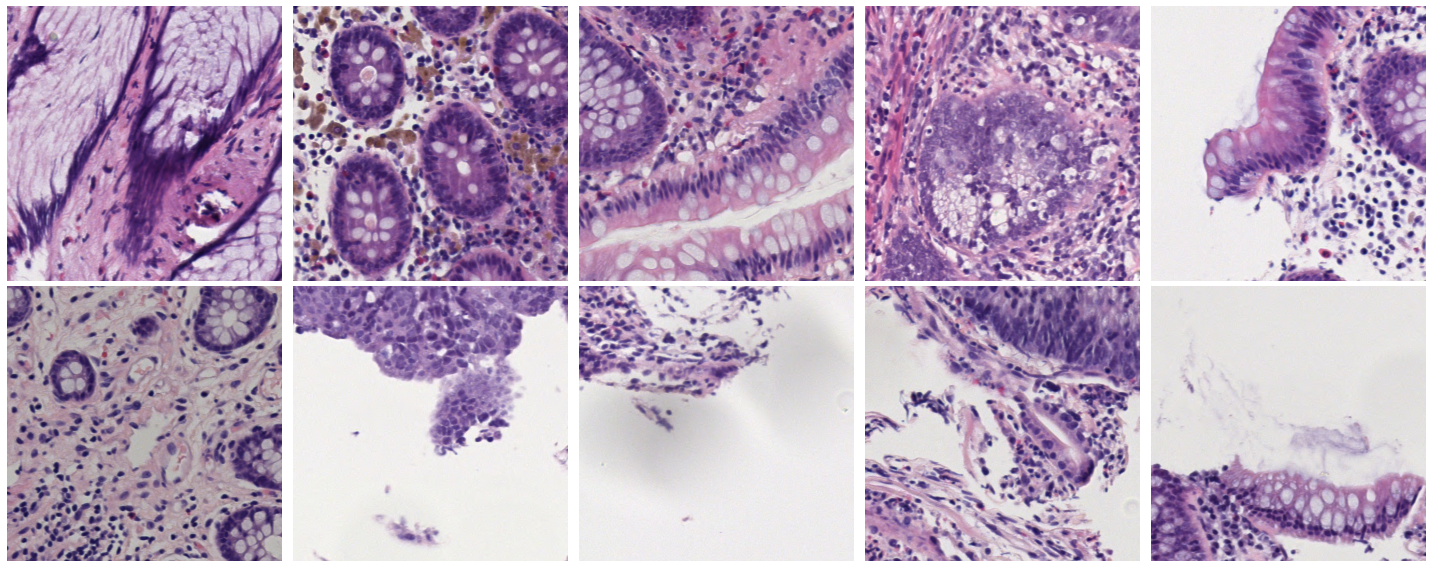

In [35]:
def display_image_in_grid(image_path, position, grid_size):
    plt.subplot(*grid_size, position)  # Create a subplot in the specified grid position
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide the axis

# Number of images to display
num_images_to_show = 10

# Grid size (rows, columns)
grid_size = (2, 5)

plt.figure(figsize=(20, 8))  # Set the figure size (width, height)

# Loop through the first few images and display them in the grid
for i in range(min(num_images_to_show, len(df2))):
    file_path = os.path.join(directory2, df2.iloc[i]['Filename'])
    display_image_in_grid(file_path, i+1, grid_size)

plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()

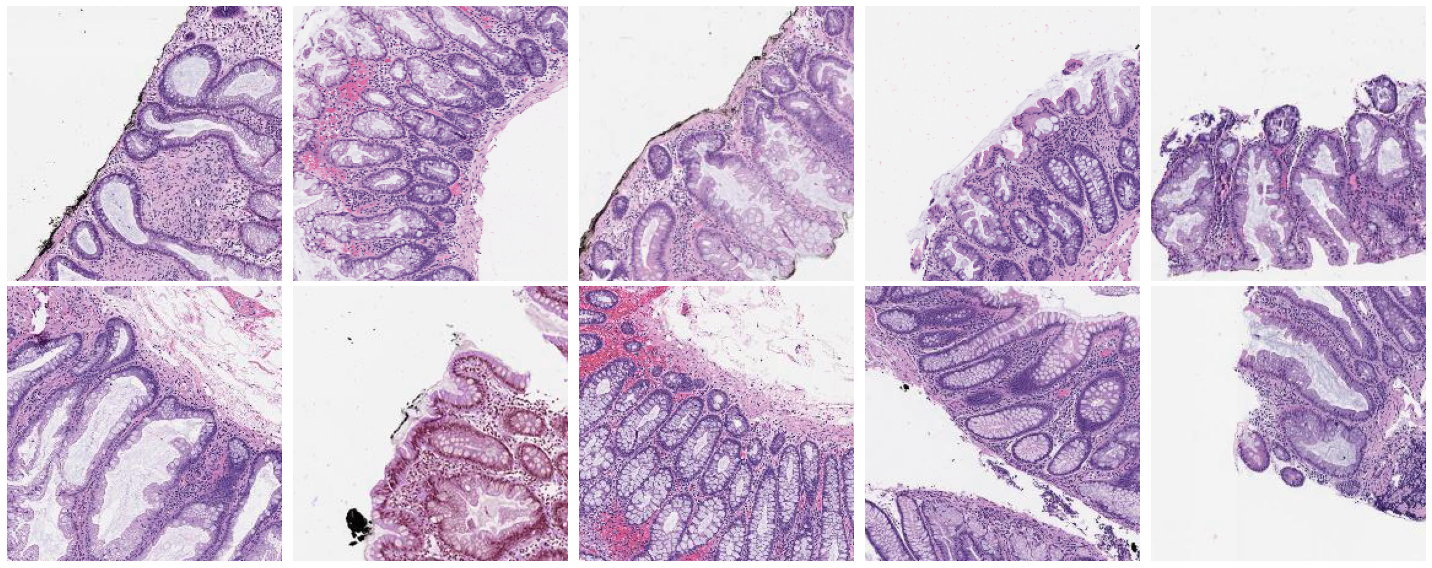

In [36]:
def display_image_in_grid(image_path, position, grid_size):
    plt.subplot(*grid_size, position)  # Create a subplot in the specified grid position
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide the axis

# Number of images to display
num_images_to_show = 10

# Grid size (rows, columns)
grid_size = (2, 5)

plt.figure(figsize=(20, 8))  # Set the figure size (width, height)

# Loop through the first few images and display them in the grid
for i in range(min(num_images_to_show, len(df3))):
    file_path = os.path.join(directory3, df3.iloc[i]['Filename'])
    display_image_in_grid(file_path, i+1, grid_size)

plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()

### Next Steps:

#### Self-Directed Learning 
- how to load json file and convert it using tensorflow 

#### Resizing and Re-Scaling
The Chaoyang and MHIST images are not the same in px size 
- Chaoyang images are 512 x 512
- MHIST images are 224 x 224

Evaluation - 
Chaoyang images are more zoomed in while the MHIST images are less magnified although the images are smaller. Consider zooming in with the MHIST dataset. 

#### Normalization and standardization 
Some images are darker than others also some hues are brighter than others - explore how this can affect the modeling

#### Data Augmentation
Create some new images by Rotating, scaling, cropping, flipping, and adding color adjustments to help the CNN learn more robustly

#### Baseline Modeling
Create predefined filters to highlight certain features that the CNN can learn from



